## Import Library

Berikut adalah daftar *library* yang akan digunakan dan kegunaannya:
*   Pandas untuk memproses *dataframe* dan CSV
*   Matplotlib untuk *plotting* grafik
*   Seaborn untuk *plotting* grafik
*   Sklearn untuk *machine learning model*
*   String untuk memproses string





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Membaca *File* CSV dan *Concat Dataframe*

In [2]:
def concat_df(train_data, test_data):
	#Returns a concatenated df of training and test set
	return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

# Penjelasan *Dataset*

# *Exploring Data*

In [3]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))

print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['TARGET'].shape[0]))

print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 307511
Number of Test Examples = 48744

Training X Shape = (307511, 122)
Training y Shape = 307511

Test X Shape = (48744, 121)
Test y Shape = 48744

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT

#**Mengenali Missing Data dari Kolom**

# Missing Values Training Set dan Test Set

In [4]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

def display_missing(df):    
    for col in df.columns.tolist():         
        print('{} column missing values: {} atau sebanyak {:,.2f}% dari total data.'.format(col, df[col].isnull().sum(), 100*df[col].isnull().sum()/len(df)))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
SK_ID_CURR column missing values: 0 atau sebanyak 0.00% dari total data.
TARGET column missing values: 0 atau sebanyak 0.00% dari total data.
NAME_CONTRACT_TYPE column missing values: 0 atau sebanyak 0.00% dari total data.
CODE_GENDER column missing values: 0 atau sebanyak 0.00% dari total data.
FLAG_OWN_CAR column missing values: 0 atau sebanyak 0.00% dari total data.
FLAG_OWN_REALTY column missing values: 0 atau sebanyak 0.00% dari total data.
CNT_CHILDREN column missing values: 0 atau sebanyak 0.00% dari total data.
AMT_INCOME_TOTAL column missing values: 0 atau sebanyak 0.00% dari total data.
AMT_CREDIT column missing values: 0 atau sebanyak 0.00% dari total data.
AMT_ANNUITY column missing values: 12 atau sebanyak 0.00% dari total data.
AMT_GOODS_PRICE column missing values: 278 atau sebanyak 0.09% dari total data.
NAME_TYPE_SUITE column missing values: 1292 atau sebanyak 0.42% dari total data.
NAME_INCOME_TYPE column missing values: 0 atau sebanyak 0.00% dari total d

ENTRANCES_AVG column missing values: 23579 atau sebanyak 48.37% dari total data.
FLOORSMAX_AVG column missing values: 23321 atau sebanyak 47.84% dari total data.
FLOORSMIN_AVG column missing values: 32466 atau sebanyak 66.61% dari total data.
LANDAREA_AVG column missing values: 28254 atau sebanyak 57.96% dari total data.
LIVINGAPARTMENTS_AVG column missing values: 32780 atau sebanyak 67.25% dari total data.
LIVINGAREA_AVG column missing values: 23552 atau sebanyak 48.32% dari total data.
NONLIVINGAPARTMENTS_AVG column missing values: 33347 atau sebanyak 68.41% dari total data.
NONLIVINGAREA_AVG column missing values: 26084 atau sebanyak 53.51% dari total data.
APARTMENTS_MODE column missing values: 23887 atau sebanyak 49.01% dari total data.
BASEMENTAREA_MODE column missing values: 27641 atau sebanyak 56.71% dari total data.
YEARS_BEGINEXPLUATATION_MODE column missing values: 22856 atau sebanyak 46.89% dari total data.
YEARS_BUILD_MODE column missing values: 31818 atau sebanyak 65.28% 

# Missing Values All Set

In [5]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_all]

def display_missing(df):    
    for col in df.columns.tolist():         
        print('{} column missing values: {} atau sebanyak {:,.2f}% dari total data.'.format(col, df[col].isnull().sum(), 100*df[col].isnull().sum()/len(df)))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

All Set
AMT_ANNUITY column missing values: 36 atau sebanyak 0.01% dari total data.
AMT_CREDIT column missing values: 0 atau sebanyak 0.00% dari total data.
AMT_GOODS_PRICE column missing values: 278 atau sebanyak 0.08% dari total data.
AMT_INCOME_TOTAL column missing values: 0 atau sebanyak 0.00% dari total data.
AMT_REQ_CREDIT_BUREAU_DAY column missing values: 47568 atau sebanyak 13.35% dari total data.
AMT_REQ_CREDIT_BUREAU_HOUR column missing values: 47568 atau sebanyak 13.35% dari total data.
AMT_REQ_CREDIT_BUREAU_MON column missing values: 47568 atau sebanyak 13.35% dari total data.
AMT_REQ_CREDIT_BUREAU_QRT column missing values: 47568 atau sebanyak 13.35% dari total data.
AMT_REQ_CREDIT_BUREAU_WEEK column missing values: 47568 atau sebanyak 13.35% dari total data.
AMT_REQ_CREDIT_BUREAU_YEAR column missing values: 47568 atau sebanyak 13.35% dari total data.
APARTMENTS_AVG column missing values: 179948 atau sebanyak 50.51% dari total data.
APARTMENTS_MEDI column missing values: 17

OCCUPATION_TYPE column missing values: 111996 atau sebanyak 31.44% dari total data.
ORGANIZATION_TYPE column missing values: 0 atau sebanyak 0.00% dari total data.
OWN_CAR_AGE column missing values: 235241 atau sebanyak 66.03% dari total data.
REGION_POPULATION_RELATIVE column missing values: 0 atau sebanyak 0.00% dari total data.
REGION_RATING_CLIENT column missing values: 0 atau sebanyak 0.00% dari total data.
REGION_RATING_CLIENT_W_CITY column missing values: 0 atau sebanyak 0.00% dari total data.
REG_CITY_NOT_LIVE_CITY column missing values: 0 atau sebanyak 0.00% dari total data.
REG_CITY_NOT_WORK_CITY column missing values: 0 atau sebanyak 0.00% dari total data.
REG_REGION_NOT_LIVE_REGION column missing values: 0 atau sebanyak 0.00% dari total data.
REG_REGION_NOT_WORK_REGION column missing values: 0 atau sebanyak 0.00% dari total data.
SK_ID_CURR column missing values: 0 atau sebanyak 0.00% dari total data.
TARGET column missing values: 48744 atau sebanyak 13.68% dari total data.

#**Mengetahui Korelasi Fitur**

Korelasi setiap fitur pada data *train*:

In [6]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

                              SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOOR

Korelasi tiap fitur pada data *train* terhadap 'TARGET':

In [7]:
korelasi = df_train.corr()['TARGET'].abs().sort_values(ascending=False)
print(korelasi.to_string())

TARGET                          1.000000
EXT_SOURCE_3                    0.178919
EXT_SOURCE_2                    0.160472
EXT_SOURCE_1                    0.155317
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
DAYS_EMPLOYED                   0.044932
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
FLOORSMAX_AVG                   0.044003
FLOORSMAX_MEDI                  0.043768
FLOORSMAX_MODE                  0.043226
DAYS_REGISTRATION               0.041975
AMT_GOODS_PRICE                 0.039645
OWN_CAR_AGE                     0.037612
REGION_POPULATION_RELATIVE      0.037227
ELEVATORS_AVG                   0.034199
ELEVATORS_MEDI                  0.033863
FLOORSMIN_AVG                   0.033614
FLOORSMIN_MEDI  

# **Mengatasi *Missing Values*** 

*Missing values* yang diisi hanya yang memiliki korelasi terhadap TARGET lebih besar dari 0.010000.

Mengisi *missing values* yang *numeric* dengan *median* setiap variabel.



In [8]:
isi_misval = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_LAST_PHONE_CHANGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'AMT_REQ_CREDIT_BUREAU_MON', 'BASEMENTAREA_MEDI', 'AMT_ANNUITY', 'BASEMENTAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'LIVINGAREA_MODE', 'APARTMENTS_MODE', 'ELEVATORS_MEDI', 'AMT_REQ_CREDIT_BUREAU_DAY', 'ELEVATORS_AVG']
for col_name in isi_misval:
  median = df_all[col_name].median()
  df_all[col_name].fillna(median, inplace=True)

print('\nJumlah missing values setelah di imputer datanya adalah:')
print(df_all.isnull().sum().sort_values())


Jumlah missing values setelah di imputer datanya adalah:
AMT_ANNUITY                      0
FLOORSMAX_MODE                   0
FLOORSMAX_MEDI                   0
FLOORSMAX_AVG                    0
FLAG_WORK_PHONE                  0
                             ...  
NONLIVINGAPARTMENTS_MEDI    246861
NONLIVINGAPARTMENTS_AVG     246861
COMMONAREA_MODE             248360
COMMONAREA_AVG              248360
COMMONAREA_MEDI             248360
Length: 122, dtype: int64


Mengatasi *missing values* pada variabel tipe data *objek* dengan 'Unknown'.

In [38]:
df_all['OCCUPATION_TYPE','ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'].fillna('Unknown', inplace=True)

KeyError: ('OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE')

In [39]:
print('\nJumlah missing values setelah di imputer datanya adalah:')
print(df_all.select_dtypes('object').isnull().sum().sort_values())


Jumlah missing values setelah di imputer datanya adalah:
Series([], dtype: float64)


# **Exploratory Data Analysis (EDA)**

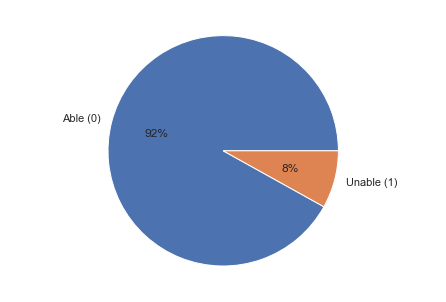

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Able (0)','Unable (1)']
target = df_train['TARGET'].value_counts()
ax.pie(target, labels=labels, autopct='%.0f%%')
plt.show()

In [11]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
  temp = df_train[feature].value_counts()
  df1 = pd.DataFrame({feature: temp.index, 'Number of contracts' : temp.values})

  #Calculate the percentage of target=1 per category value
  cat_perc = df_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
  cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

  if(horizontal_layout):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  else:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))

  sns.set_color_codes("pastel")
  s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1)

  if(label_rotation):
    s.set_xticklabels(s.get_xticklabels(), rotation=90)

  s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

  if(label_rotation):
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
  
  plt.ylabel('Percent of target with value 1 (%)', fontsize=10)
  plt.tick_params(axis='both', which='major', labelsize=10)
  
  plt.show();

In [12]:
def plot_distribution_comp(var, nrow=2):
  i=0
  t1=df_train.loc[df_train['TARGET'] !=0]
  t0=df_train.loc[df_train['TARGET'] ==0]

  sns.set_style('whitegrid')
  plt.figure()
  fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

  for feature in var:
    i += 1
    plt.subplot(nrow,2,i)
    sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")

    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

  plt.show();

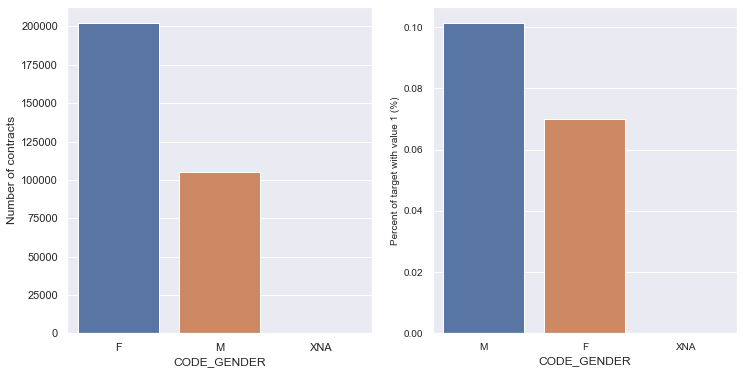

In [13]:
plot_stats('CODE_GENDER')

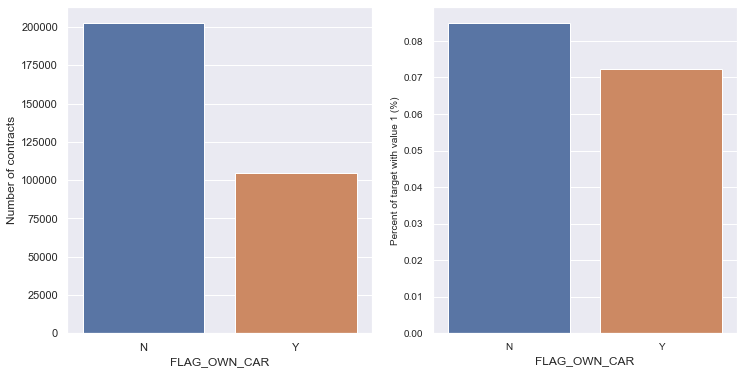

In [14]:
plot_stats('FLAG_OWN_CAR')

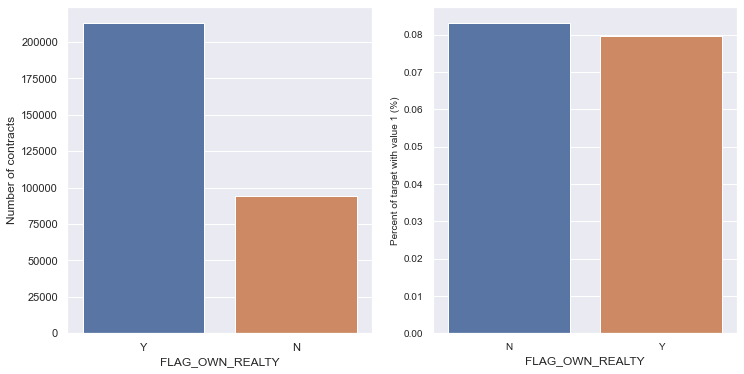

In [15]:
plot_stats('FLAG_OWN_REALTY')

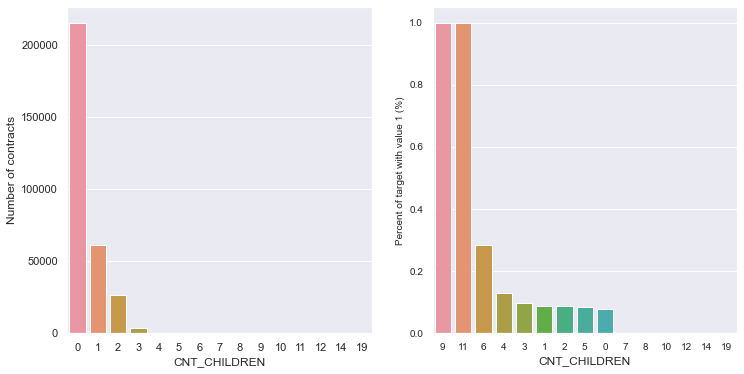

In [16]:
plot_stats('CNT_CHILDREN')

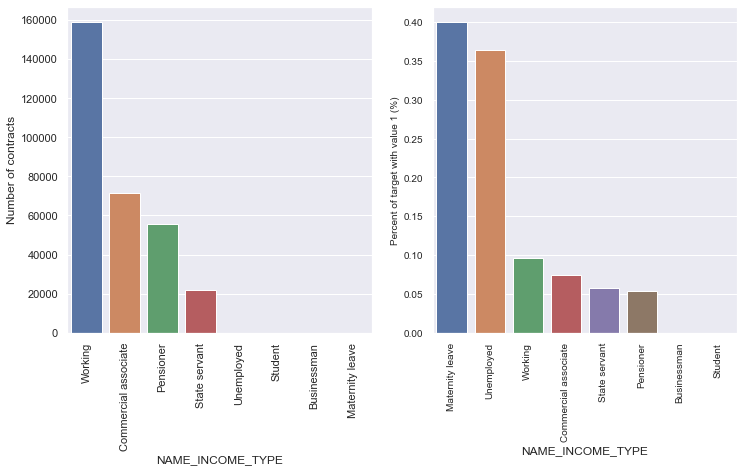

In [17]:
plot_stats('NAME_INCOME_TYPE', True)

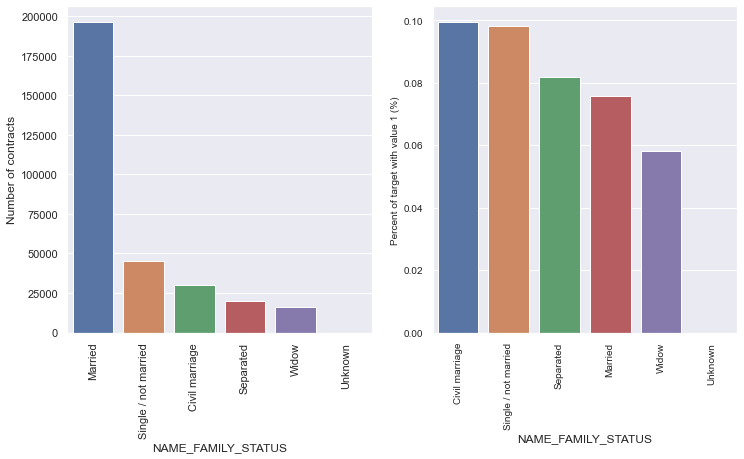

In [18]:
plot_stats('NAME_FAMILY_STATUS', True)

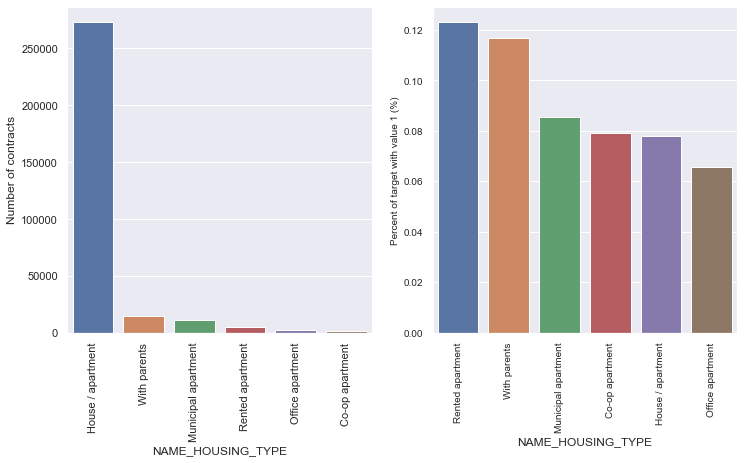

In [19]:
plot_stats('NAME_HOUSING_TYPE', True)

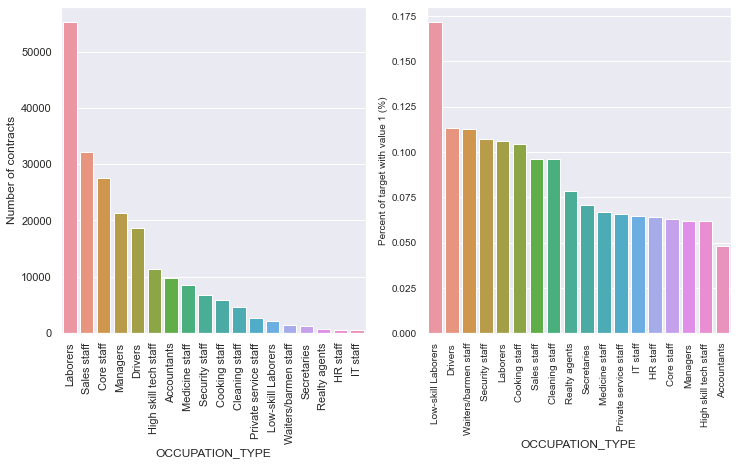

In [20]:
plot_stats('OCCUPATION_TYPE', True)

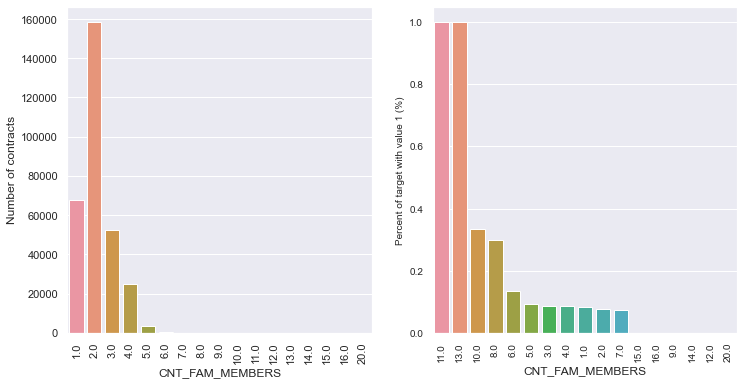

In [21]:
plot_stats('CNT_FAM_MEMBERS',True)

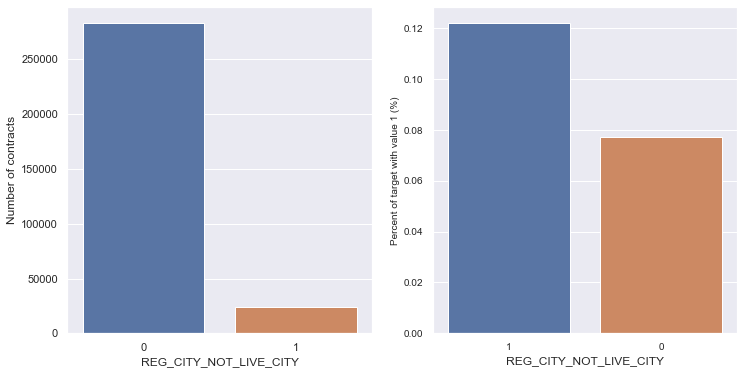

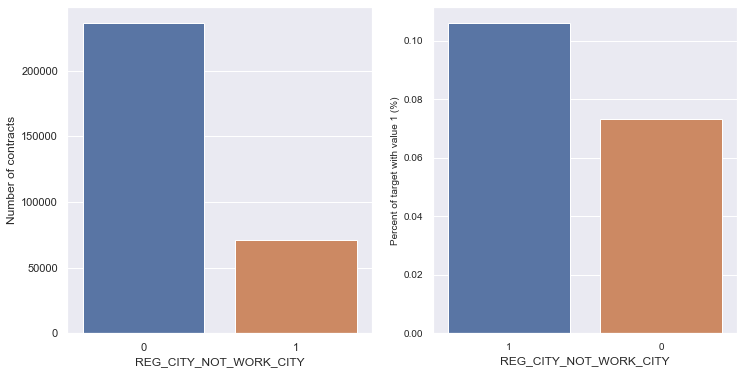

In [22]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

<Figure size 432x288 with 0 Axes>

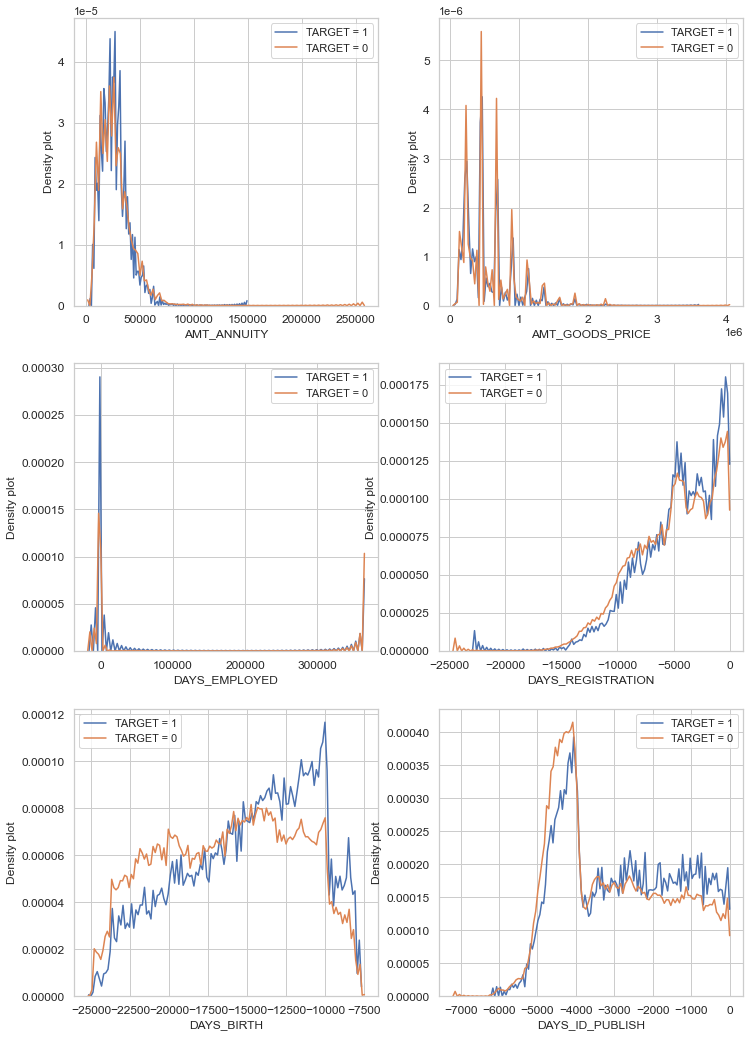

In [23]:
col_name = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH']
plot_distribution_comp(col_name, nrow=3)


Persebaran data sebelum ditangani Outlier: 
       DAYS_EMPLOYED   CNT_CHILDREN    AMT_ANNUITY  CNT_FAM_MEMBERS
count  356255.000000  356255.000000  356255.000000    356255.000000
mean    64317.231413       0.414316   27425.323483         2.151858
std    141705.532576       0.720378   14732.082676         0.907935
min    -17912.000000       0.000000    1615.500000         1.000000
25%     -2781.000000       0.000000   16731.000000         2.000000
50%     -1224.000000       0.000000   25078.500000         2.000000
75%      -290.000000       1.000000   34960.500000         3.000000
max    365243.000000      20.000000  258025.500000        21.000000


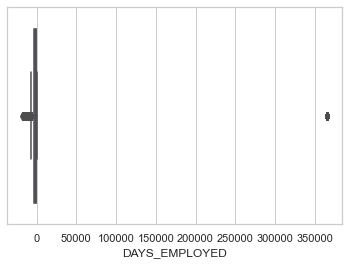

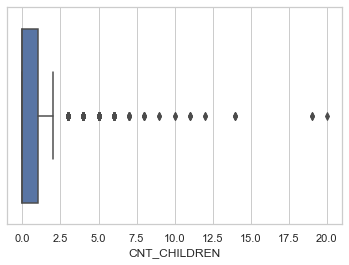

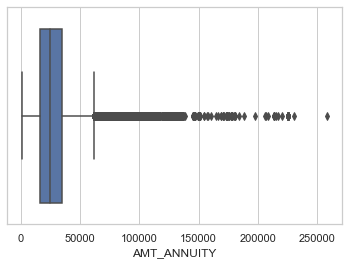

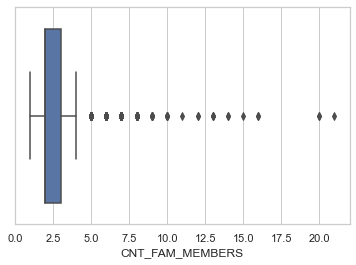

In [24]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_all[['DAYS_EMPLOYED','CNT_CHILDREN','AMT_ANNUITY','CNT_FAM_MEMBERS']].describe())

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_all['DAYS_EMPLOYED'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_all['CNT_CHILDREN'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_all['AMT_ANNUITY'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_all['CNT_FAM_MEMBERS'])
plt.show()

In [25]:
# Handling with IQR
Q1 = (df_all[['DAYS_EMPLOYED','CNT_CHILDREN','AMT_ANNUITY','CNT_FAM_MEMBERS']]).quantile(0.25)
Q3 = (df_all[['DAYS_EMPLOYED','CNT_CHILDREN','AMT_ANNUITY','CNT_FAM_MEMBERS']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing variabel adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing variabel adalah: ')
print(minimum)
more_than = (df_all > maximum)
lower_than = (df_all < minimum)
df_all = df_all.mask(more_than, maximum, axis=1)
df_all = df_all.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_all[['DAYS_EMPLOYED','CNT_CHILDREN','AMT_ANNUITY','CNT_FAM_MEMBERS']].describe())

Nilai Maximum dari masing-masing variabel adalah: 
DAYS_EMPLOYED       3446.50
CNT_CHILDREN           2.50
AMT_ANNUITY        62304.75
CNT_FAM_MEMBERS        4.50
dtype: float64

Nilai Minimum dari masing-masing variabel adalah: 
DAYS_EMPLOYED      -6517.50
CNT_CHILDREN          -1.50
AMT_ANNUITY       -10613.25
CNT_FAM_MEMBERS        0.50
dtype: float64

Persebaran data setelah ditangani Outlier: 
       DAYS_EMPLOYED   CNT_CHILDREN    AMT_ANNUITY  CNT_FAM_MEMBERS
count  356255.000000  356255.000000  356255.000000    356255.000000
mean    -1204.038185       0.404806   27102.784355         2.142896
std      2754.734415       0.681633   13487.852778         0.876654
min     -6517.500000       0.000000    1615.500000         1.000000
25%     -2781.000000       0.000000   16731.000000         2.000000
50%     -1224.000000       0.000000   25078.500000         2.000000
75%      -290.000000       1.000000   34960.500000         3.000000
max      3446.500000       2.500000   62304.750000    

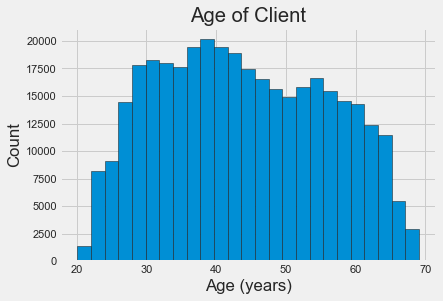

In [26]:
df_all['DAYS_BIRTH'] = abs(df_all['DAYS_BIRTH'])

plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_all['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [27]:
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0

In [28]:
df_all['AGE_RANGE'] = df_all['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

# ***Drop Unnecessary Columns***

In [31]:
drop_list = ['ENTRANCES_MODE', 'LIVE_REGION_NOT_WORK_REGION', 'ELEVATORS_MODE', 'FLAG_DOCUMENT_14', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_15', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'FLAG_DOCUMENT_21', 'LANDAREA_MEDI', 'APARTMENTS_MEDI', 'LANDAREA_AVG', 'FLAG_EMAIL', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_17', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_18', 'NONLIVINGAREA_AVG', 'LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'REG_REGION_NOT_WORK_REGION', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_5', 'FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE']
df_all.drop(drop_list, axis=1, inplace=True)

# ***Encoding Data***

In [32]:
for column in df_all.columns:
	if df_all[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	df_all[column] = LabelEncoder().fit_transform(df_all[column])
print(df_all.describe())

         AMT_ANNUITY    AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
count  356255.000000  3.562550e+05     3.562550e+05      3.562550e+05   
mean    27102.784355  5.877674e+05     5.279591e+05      1.701161e+05   
std     13487.852778  3.986237e+05     3.659286e+05      2.235068e+05   
min      1615.500000  4.500000e+04     4.050000e+04      2.565000e+04   
25%     16731.000000  2.700000e+05     2.340000e+05      1.125000e+05   
50%     25078.500000  5.002110e+05     4.500000e+05      1.530000e+05   
75%     34960.500000  7.975575e+05     6.750000e+05      2.025000e+05   
max     62304.750000  4.050000e+06     4.050000e+06      1.170000e+08   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_MON  \
count              356255.000000              356255.000000   
mean                    0.005443                   0.200761   
std                     0.097064                   0.800646   
min                     0.000000                   0.000000   
25%                     0.0

# ***Splitting Dataset***

In [33]:
df_all.shape

(356255, 65)

In [34]:
df_train.shape[0]

307511

In [35]:
df_test.shape[0]

48744

In [36]:
df_train = df_all.loc[:9691]
df_test = df_all.loc[9692:]
dfs = [df_train, df_test]

In [44]:
df_train.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,TARGET,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,AGE_RANGE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,1.0,0.0252,0.0369,0.0369,...,0,0,0,1.0,5,6,0.9722,0.9722,0.9722,0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0924,0.0529,0.0529,...,0,0,0,0.0,0,1,0.9851,0.9851,0.9851,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0840,0.0765,0.0761,...,0,0,0,0.0,7,1,0.9816,0.9816,0.9816,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,1.0,0.0840,0.0765,0.0761,...,0,0,0,0.0,7,6,0.9816,0.9816,0.9816,0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0840,0.0765,0.0761,...,0,1,0,0.0,7,4,0.9816,0.9816,0.9816,0


In [42]:
df_train = pd.get_dummies(df_train)

In [56]:
X_transform = pd.DataFrame(X_transform,columns = X.columns)

## Train test split

In [54]:
X = df_train.drop(['TARGET'],1)
y = df_train['TARGET']

In [125]:
df_train['TARGET'].value_counts()

0.0    8937
1.0     755
Name: TARGET, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 333)

In [58]:
y_train.value_counts(normalize=True)

0.0    0.921433
1.0    0.078567
Name: TARGET, dtype: float64

In [78]:
y_train.value_counts()

0.0    6251
1.0     533
Name: TARGET, dtype: int64

## Balancing

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)

In [60]:
X_smote.shape

(12502, 64)

In [61]:
y_smote.value_counts()

1.0    6251
0.0    6251
Name: TARGET, dtype: int64

## KNN

In [65]:
def evaluasi_model(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=3)

In [67]:
evaluasi_model(knn,X_test,y_test)

0.7149243466299863

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
evaluasi_model(knn,X_test,y_test)

0.9102475928473177

## Hyperparameter KNN

In [79]:
params = {'n_neighbors':[1,2,3,4,5,6,7]}

In [80]:
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(
             estimator=knn,
             param_grid=params,
             scoring = 'accuracy',
             cv = 3
            )

In [82]:
grid_knn.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [83]:
grid_knn.best_params_

{'n_neighbors': 1}

In [84]:
evaluasi_model(grid_knn,X_test,y_test)

0.7644429160935351

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_smote,y_smote)

DecisionTreeClassifier()

In [86]:
evaluasi_model(dtc,X_smote,y_smote)

1.0

In [87]:
evaluasi_model(dtc,X_test,y_test)

0.8259972489683631

## Tuning Hyperparameter DT

In [126]:
params_dtc = {'max_depth':[3,5,7,8,9,11]}

In [127]:
from sklearn.model_selection import GridSearchCV
grid_dtc = GridSearchCV(
             estimator=dtc,
             param_grid=params_dtc,
             scoring = 'accuracy',
             cv = 3 
            )

In [128]:
grid_dtc.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 8, 9, 11]}, scoring='accuracy')

In [129]:
grid_dtc.best_params_

{'max_depth': 11}

In [130]:
evaluasi_model(grid_dtc,X_smote,y_smote)

0.943848984162534

In [131]:
evaluasi_model(grid_dtc,X_test,y_test)

0.8235900962861072

## Logreg 

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_smote,y_smote)

C:\Users\Sugeng\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
evaluasi_model(logreg,X_smote,y_smote)

0.6285394336906095

In [96]:
evaluasi_model(logreg,X_test,y_test)

0.6451169188445667

In [97]:
params_logreg = {'C':[0.1,0.5,1,2,3]}

In [98]:
from sklearn.model_selection import GridSearchCV
grid_logreg = GridSearchCV(
             estimator=logreg,
             param_grid=params_logreg,
             scoring = 'accuracy',
             cv = 3
            )

In [99]:
grid_logreg.fit(X_smote,y_smote)

C:\Users\Sugeng\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sugeng\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3]}, scoring='accuracy')

In [100]:
grid_logreg.best_params_

{'C': 2}

In [101]:
evaluasi_model(grid_logreg,X_smote,y_smote)

0.6278995360742281

In [102]:
evaluasi_model(grid_logreg,X_test,y_test)

0.6447730398899587

## Ensemble Method - Voting Classifier

In [103]:
from sklearn.ensemble import VotingClassifier

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

list_model = [('lr',logreg),('tree',dtc),('svm',svm),('knn',knn)]

In [105]:
vote = VotingClassifier(list_model)
vote.fit(X_smote,y_smote)

C:\Users\Sugeng\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier())])

In [106]:
evaluasi_model(vote,X_test,y_test)

0.8174002751031637

## Ensemble Method - Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier(random_state=333)
rf.fit(X_smote,y_smote)

RandomForestClassifier(random_state=333)

In [109]:
evaluasi_model(rf,X_test,y_test)

0.9181568088033012

## Ensemble Method - Bagging 

In [111]:
from sklearn.ensemble import BaggingClassifier

In [112]:
bagging = BaggingClassifier()
bagging.fit(X_smote,y_smote)

BaggingClassifier()

In [113]:
evaluasi_model(bagging,X_test,y_test)

0.8975240715268226

## Ensemble Method - Gradient Boosting Classifier

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
grad = GradientBoostingClassifier()
grad.fit(X_smote,y_smote)

GradientBoostingClassifier()

In [117]:
evaluasi_model(grad,X_test,y_test)

0.9095598349381018